In [144]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify

In [22]:
#1
a = 1/2
b = 3/2

x = symbols('x')
f_sym = x**3

#rectangles
def rectangles(a, b , f):
    return (b - a)*f((a+b)/2)

exact_value = 1.25
absolute_error = exact_value - rectangles(a,b,f)
absolute_error

f_second_diff = diff(f_sym, x, 2)
f_double_prime = lambdify(x, f_second_diff, 'numpy')

psi = np.linspace(a, b, 1000)
f_double_prime_max = max(abs(f_double_prime(psi)))

error_rect = (f_double_prime_max / 24) * (b - a)**3
error_rect

0.375

In [28]:
#trapezoids
def trap(a,b,f):
    return (b-a)/2*(f(a) + f(b))

absolute_error = abs(exact_value - trap(a,b,f))
absolute_error

f_second_diff = diff(f_sym, x, 2)
f_double_prime = lambdify(x, f_second_diff, 'numpy')

psi = np.linspace(a,b,1000)
f_double_prime_max = max(abs(f_double_prime(psi)))

error_trap = (f_double_prime_max / 12)*(b-a)**3
error_trap
                         

0.75

In [56]:
#Simpson
x = symbols('x')
f_sym = x**3
f = lambdify(x, f_sym, 'numpy')

def Simpson(a,b,f):
    return ((b-a)/6) * (f(a) + 4 * f((a+b)/2) + f(b))

absolute_error = abs(exact_value - Simpson(a,b,f))
absolute_error

f_fourth_diff = diff(f_sym, x, 4)
f_fourth_prime = lambdify(x, f_fourth_diff, 'numpy')


psi = np.linspace(a, b, 1000)  
f_fourth_prime_values = f_fourth_prime(psi)  
f_fourth_prime_max = max(abs(f_fourth_prime_values)) 

error_Simpson = (f_fourth_prime_max / 2880)*(b-a)**5
error_Simpson

(0.804964022751974, 8.936895920541299e-15)


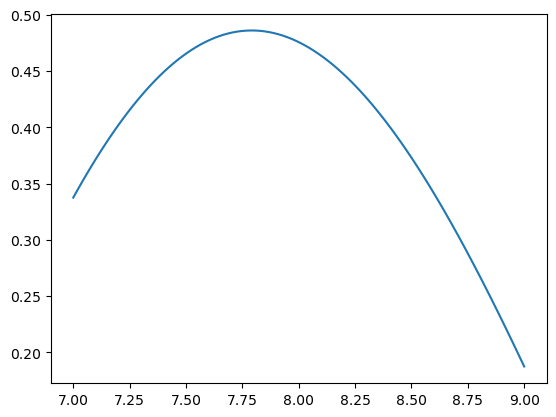

Rectangles:  0.9515614907107687
Trapezoids:  0.5251875296832664
Simpson:  0.33365609167955024


In [68]:
#2
def f(x):
    return np.sin(x)/np.log(x)

a = 7
b = 9

print(sp.integrate.quad(f, a, b))

x_axis = np.linspace(7,9,100)
plt.plot(x_axis, f(x_axis))
plt.show()

print("Rectangles: ", (b - a)*f((a+b)/2))

print("Trapezoids: ", ((b-a)/2)*(f(a) + f(b)))

print("Simpson: ", ((b-a)/6)*(f(a) + f((a+b)/2) + f(b)))

In [74]:
#3
np.sqrt(10**5/12)

91.28709291752769

In [78]:
a = 1
b = 2
def f(x):
    return 1/x

exact_val = np.log(2)
print(exact_val)

0.6931471805599453


In [99]:
#rectangles

n = int(np.ceil(100 * np.sqrt(10) / (2 * np.sqrt(3))))
print("n: ", n)

x_mesh = np.linspace(a, b, n+1)
approx_val = 0

for i in range (x_mesh.size - 1):
    approx_val += f((x_mesh[i] + x_mesh[i+1])/2)

approx_val = approx_val * (b-a)/n
print("Approximation: ", approx_val)
print("Absolute error: ", exact_val - approx_val)

n:  92
Approximation:  0.6931434885476101
Absolute error:  3.6920123351880108e-06


In [122]:
#trapezoids

n = int(np.ceil(100 * np.sqrt(10) / (np.sqrt(6))))
print("n: ", n)

x_mesh = np.linspace(a, b, n + 1)

approx_val = 0
for i in range (x_mesh.size - 1):
    approx_val += f(x_mesh[i]) + f(x_mesh[i+1])

approx_val *= (b - a) / (2 * n)
print("Approximation: ", approx_val)
print("Absolute error: ", exact_val - approx_val)

n:  130
Approximation:  0.6931508787574442
Absolute error:  -3.6981974989025446e-06


In [151]:
#Simpson

n = int(np.ceil(5 * np.sqrt(2) / np.power(3, 1 / 4)))
print("n: ", n)

x_mesh = np.linspace(a, b, n+1)

approx_val = 0
for i in range (x_mesh.size - 1):
    approx_val += f(x_mesh[i]) + 4 * f((x_mesh[i] + x_mesh[i+1])/2) + f(x_mesh[i+1])

approx_val *= (b - a) / (6 * n)
print("Approximation: ", approx_val)
print("Absolute error: ", exact_val - approx_val)

n:  6
Approximation:  0.693148662209101
Absolute error:  -1.4816491556990385e-06
